In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
btc = pd.read_csv('data/bitcoin_return.csv')

In [6]:
print(btc.head())

                        date  daily_return  return_1w  return_1m  return_1q  \
0  2017-05-29 00:00:00+00:00      0.026365   0.037247   0.629222   0.857192   
1  2017-05-30 00:00:00+00:00      0.017545   0.026851   0.655003   0.868832   
2  2017-05-31 00:00:00+00:00     -0.010502  -0.055221   0.570208   0.800043   
3  2017-06-01 00:00:00+00:00      0.065134  -0.068191   0.618931   0.866019   
4  2017-06-02 00:00:00+00:00      0.014951   0.014786   0.615984   0.893917   

   return_1y  
0   3.223767  
1   3.232526  
2   3.171874  
3   3.460404  
4   3.503223  


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (2,) and arg 3 with shape (1677,).

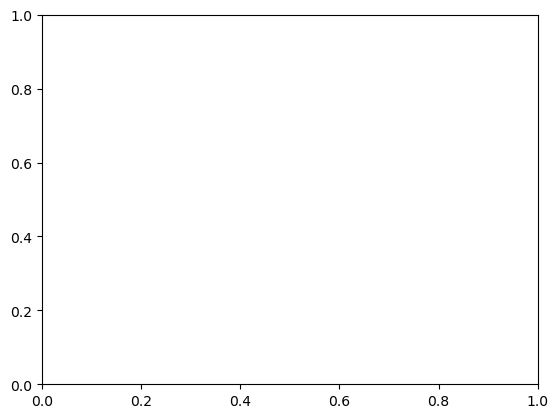

In [28]:
btc_target = btc['daily_return'].copy()
btc_binary = btc_target.apply(lambda x: 1 if x > 0 else -1)
plt.barh(btc_target.value_counts().index, btc_binary.value_counts().values)
plt.show()

In [29]:
btc_features = btc.drop(['daily_return','date'], axis=1).copy()

In [30]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(btc_features.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(btc_features,btc_binary,epochs=100,batch_size=32)

2024-04-24 15:40:32.532478: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-24 15:40:32.532936: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-24 15:40:32.533654: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2024-04-24 15:40:32.742416: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-24 15:40:32.742845: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-24 15:40:32.743398: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

53/53 [==============================] - 2s 6ms/step - loss: 0.9872
Epoch 2/100
53/53 [==============================] - 0s 5ms/step - loss: 0.9552
Epoch 3/100
53/53 [==============================] - 0s 5ms/step - loss: 0.9449
Epoch 4/100
53/53 [==============================] - 0s 4ms/step - loss: 0.9460
Epoch 5/100
53/53 [==============================] - 0s 5ms/step - loss: 0.9396
Epoch 6/100
53/53 [==============================] - 0s 5ms/step - loss: 0.9440
Epoch 7/100
53/53 [==============================] - 0s 5ms/step - loss: 0.9403
Epoch 8/100
53/53 [==============================] - 0s 5ms/step - loss: 0.9394
Epoch 9/100
53/53 [==============================] - 0s 5ms/step - loss: 0.9326
Epoch 10/100
53/53 [==============================] - 0s 5ms/step - loss: 0.9354
Epoch 11/100
53/53 [==============================] - 0s 5ms/step - loss: 0.9339
Epoch 12/100
53/53 [==============================] - 0s 5ms/step - loss: 0.9320
Epoch 13/100
53/53 [=============================

In [33]:
y_pred = model.predict(btc_features)

53/53 [==============================] - 0s 1ms/step


In [40]:
y_pred = np.where(y_pred > 0, 1, -1) 
tmp = pd.DataFrame({'date':btc['date'],'pred':y_pred.flatten()})
tmp['return'] = btc_target * tmp['pred']

In [42]:
tmp['remain'] = tmp['return'].apply(lambda x: x+1 )

In [43]:
tmp['cumprod'] = tmp['remain'].cumprod()

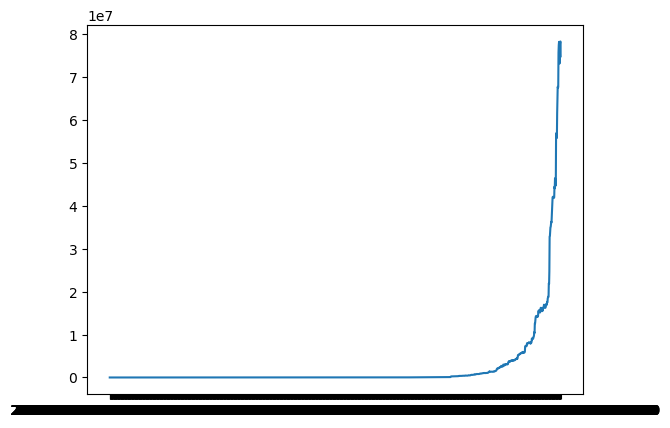

In [44]:
plt.plot(tmp['date'], tmp['cumprod'], label='cumulative return')